Import libraries

In [71]:
import os 
from utils import load_pickle, load_json
import matplotlib.pyplot as plt

Settings

In [76]:
dataset = "canopus"
split = "inchikey_vanilla"

folder = "../FP_prediction/mist/best_models"
main_model_folder = os.path.join(folder, dataset)
main_model_folder = [os.path.join(main_model_folder, f) for f in os.listdir(main_model_folder) if split in f][0]
no_sampling_score = 0.300 # round(load_json(os.path.join(main_model_folder, "test_performance.json"))["jaccard"], 3)

all_results = {"random": {100: no_sampling_score}, "IF": {100: no_sampling_score}} 

sampling_models_folder = os.path.join(folder, f"{dataset}_w_sampling", split)

for f in os.listdir(sampling_models_folder):

    score = round(load_json(os.path.join(sampling_models_folder, f, "test_performance.json"))["jaccard"], 3)
    f_list = f.split("_")

    if "random" in f_list: 

        all_results["random"][int(f_list[5])] = score 
    
    else: 

        all_results["IF"][int(f_list[5])] = score 


print(all_results)

{'random': {100: 0.3, 90: 0.299, 10: 0.258, 50: 0.283, 30: 0.275, 70: 0.298}, 'IF': {100: 0.3, 70: 0.296, 90: 0.299, 10: 0.232, 50: 0.285, 30: 0.264}}


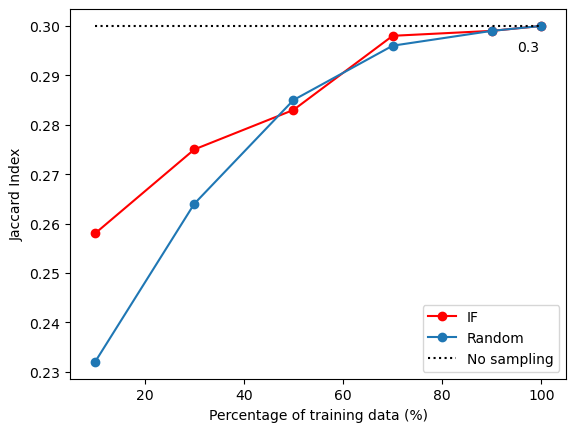

In [77]:
x_values = sorted(list(all_results["random"].keys()))

random = [all_results["random"][x] for x in x_values]
IF = [all_results["IF"][x] for x in x_values]
full = [all_results["random"][100] for _ in x_values]
 
plt.xlabel("Percentage of training data (%)")
plt.ylabel("Jaccard Index")
plt.xlim(5, 105)
plt.plot(x_values, random, label = "IF", color = "red", marker = "o")
plt.plot(x_values, IF, label = "Random", marker = "o")
plt.plot(x_values, full, label = "No sampling", linestyle = "dotted", color = "black")
plt.annotate(full[0], (95, full[0] - 0.005))

plt.legend()
plt.show()
